<a href="https://colab.research.google.com/github/1Jigeesha/NLP_task/blob/main/NLP_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.1 Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #visualisation
import seaborn as sns                  #Visualisation library
%matplotlib inline

### **1.2 Importing the Spacy**

In [ ]:
#spacy is a library for processing and analyzing data in NLP 
import spacy

#displacy is dependency visualizer
from spacy import displacy 

nlp = spacy.load('en')

### **1.3 Input String from user**

In [ ]:
input_text = input()
text1= nlp(input_text)

Delhi is the capital of India. India has population of 1.3 crores. Arvind Kejriwal is the chief minister of delhi.


### **1.4 Finding the Origins**

In [ ]:
#named entity recogniton
spacy.explain('ORG')

#text1 = nlp(input_text)
#spacy.displacy.serve(text1, style='dep')

'Companies, agencies, institutions, etc.'

### **1.5 Spliting the text**

In [ ]:
words_label = []
words_text = []
for word in text1.ents:
  words_label.append(word.label_)
  words_text.append(word.text)
  print(word.text,word.label_)

dataset =  [words_text,words_label]
print(dataset)

Delhi GPE
India GPE
India GPE
1.3 CARDINAL
Arvind Kejriwal PERSON
delhi GPE
[['Delhi', 'India', 'India', '1.3', 'Arvind Kejriwal', 'delhi'], ['GPE', 'GPE', 'GPE', 'CARDINAL', 'PERSON', 'GPE']]


### **1.6 Converting to dataframe**

In [ ]:
# import pandas as pd
import pandas as pd
df = pd.DataFrame(dataset)
df


,0,1,2,3,4,5,6
0,Delhi,India,India,136.4,Delhi,1.3,India
1,GPE,GPE,GPE,CARDINAL,GPE,CARDINAL,GPE


### **1.7 Transforming the dataframe**

In [ ]:
dataset_transpose = df.T
print(dataset_transpose)

                 0         1
0            Delhi       GPE
1            India       GPE
2            India       GPE
3            136.4  CARDINAL
4            Delhi       GPE
5              1.3  CARDINAL
6            India       GPE
7  Arvind Kejriwal    PERSON
8            Delhi       GPE


### **1.8 Renaming the columns in the dataframe**

In [ ]:

dataset_transpose = dataset_transpose.rename(columns = {0: 'text', 1: 'labels'}, inplace = False)


### **1.9 Printing the dataframe**

In [ ]:
dataset_transpose.columns
print(dataset_transpose)

              text    labels
0            Delhi       GPE
1            India       GPE
2            India       GPE
3            136.4  CARDINAL
4            Delhi       GPE
5              1.3  CARDINAL
6            India       GPE
7  Arvind Kejriwal    PERSON
8            Delhi       GPE


### **2.0 Description of dataframe**

In [ ]:
dataset_transpose.describe()

,text,labels
count,9,9
unique,5,3
top,India,GPE
freq,3,6


### **2.1 Information of dataframe**

In [ ]:
dataset_transpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9 non-null      object
 1   labels  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


### **2.2 Encoding the dataframe**

In [ ]:
data_mapped = dataset_transpose.copy()
data_mapped['labels'] = data_mapped['labels'].map({'GPE':0, "CARDINAL":1, "PERSON":2})
data_mapped

,text,labels
0,Delhi,0
1,India,0
2,India,0
3,136.4,1
4,Delhi,0
5,1.3,1
6,India,0
7,Arvind Kejriwal,2
8,Delhi,0


### **2.3 Spliting the dataframe**

In [ ]:
x = data_mapped.iloc[:,1:2]
x

,labels
0,0
1,0
2,0
3,1
4,0
5,1
6,0
7,2
8,0


### **2.4 Applying KMeans**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### **2.5 Predicting the clusters**

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 0, 1, 0, 1, 2, 1], dtype=int32)

### **2.6 Add a new columns for further classification**

In [ ]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = identified_clusters
data_with_cluster

,text,labels,Cluster
0,Delhi,0,1
1,India,0,1
2,India,0,1
3,136.4,1,0
4,Delhi,0,1
5,1.3,1,0
6,India,0,1
7,Arvind Kejriwal,2,2
8,Delhi,0,1


### **2.7 Cluster the data**

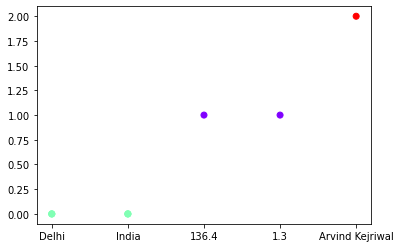

In [ ]:
plt.scatter(data_with_cluster['text'], data_with_cluster['labels'], c=data_with_cluster['Cluster'], cmap = "rainbow")

plt.show()